## behavior data analysis

In [2]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

### Necessary analysis function

In [ ]:
def in_08(i, end_data_index):
    if (end_data_index - i + 2) / 2000 <= 0.8:
        return True
    return False


def in_06(i, end_data_index):
    if (end_data_index - i + 2) / 2000 <= 0.6:
        return True
    return False


def in_04(i, end_data_index):
    if (end_data_index - i + 2) / 2000 <= 0.4:
        return True
    return False


def in_02(i, end_data_index):
    if (end_data_index - i + 2) / 2000 <= 0.2:
        return True
    return False


def cal_response_time(start_data_index, end_data_index, data):
    response_time = (end_data_index - start_data_index) / 2000
    return response_time


def cal_time_on_pic(chosen_pic, start_data_index, end_data_index, data):
    res_num = 0
    num_chosen_pic = 0
    num_chosen_pic_08 = 0
    num_chosen_pic_06 = 0
    num_chosen_pic_04 = 0
    num_chosen_pic_02 = 0
    num_pic = 0
    num_pic_08 = 0
    num_pic_06 = 0
    num_pic_04 = 0
    num_pic_02 = 0
    for i in range(start_data_index, end_data_index):
        res_num += 1
        if type(data[i][-1]) != float and '.png' in data[i][-1]:
            num_pic += 1
            if in_08(i, end_data_index):
                num_pic_08 += 1
                if in_06(i, end_data_index):
                    num_pic_06 += 1
                    if in_04(i, end_data_index):
                        num_pic_04 += 1
                        if in_02(i, end_data_index):
                            num_pic_02 += 1

            if data[i][-1] == chosen_pic:
                num_chosen_pic += 1
                if in_08(i, end_data_index):
                    num_chosen_pic_08 += 1
                    if in_06(i, end_data_index):
                        num_chosen_pic_06 += 1
                        if in_04(i, end_data_index):
                            num_chosen_pic_04 += 1
                            if in_02(i, end_data_index):
                                num_chosen_pic_02 += 1
    res_time = res_num / 2000
    total_time_on_pic = num_pic / 2000 
    time_on_pic = num_chosen_pic / 2000
    time_on_pic_08 = num_chosen_pic_08 / 2000
    time_on_pic_06 = num_chosen_pic_06 / 2000
    time_on_pic_04 = num_chosen_pic_04 / 2000
    time_on_pic_02 = num_chosen_pic_02 / 2000
    segment_num = [num_chosen_pic, num_chosen_pic_02, num_chosen_pic_04, num_chosen_pic_06, num_chosen_pic_08]
    total_view_num = [num_pic, num_pic_02, num_pic_04, num_pic_06, num_pic_08]
    prop, prop_02, prop_04, prop_06, prop_08 = cal_prop_on_pic(segment_num, total_view_num)
    return res_time, time_on_pic, time_on_pic_02, time_on_pic_04, time_on_pic_06, time_on_pic_08, prop, prop_02, prop_04, prop_06, prop_08, total_time_on_pic


def cal_prop_on_pic(segment_num, total_view_num): #segment_time (5,)
    prop =  0 if (total_view_num[0] == 0) else (float(segment_num[0]) / float(total_view_num[0]))
    prop_02 = 0 if (total_view_num[1] == 0) else (float(segment_num[1]) / float(total_view_num[1]))
    prop_04 = 0 if (total_view_num[2] == 0) else (float(segment_num[2]) / float(total_view_num[2]))
    prop_06 = 0 if (total_view_num[3] == 0) else (float(segment_num[3]) / float(total_view_num[3]))
    prop_08 = 0 if (total_view_num[4] == 0) else (float(segment_num[4]) / float(total_view_num[4]))
    return prop, prop_02, prop_04, prop_06, prop_08 


import math


def do_cal_min_max(q1, q3):
    min1 = q1 - 1.5 * (q3 - q1)
    max1 = q3 + 1.5 * (q3 - q1)
    return min1, max1


def get_mid_idx(data):
    length = len(data)
    if length % 2 == 0:
        idx1 = length / 2 - 1
        idx2 = idx1 + 1
        idx = np.mean([idx1, idx2])
    else:
        idx = math.ceil(length / 2)
    return idx


def do_cal_quarter(data):
    data.sort()
    idx = get_mid_idx(data)
    q2 = np.median(data)
    part1 = [v for i, v in enumerate(data) if i < idx]
    part2 = [v for i, v in enumerate(data) if i > idx]
    q1 = np.median(part1)
    q3 = np.median(part2)
    return q1, q2, q3

def cal_iqr(output):
    response_time = output[:, 3]
    copy = np.copy(response_time)
    q1, q2, q3 = do_cal_quarter(copy)
    min1, max1 = do_cal_min_max(q1, q3)
    return min1, max1

In [ ]:
#days = ['0223', '0224', '0225', '0226', '0227', '0228', '0302', '0303', '0304', '0305', '0306', '0307']
#days = ['0506', '0507', '0518', '0519', '0520', '0521', '0525', '0526', '0527', '0528']
days = ['0527', '0528', '0601','0602','0603','0604', '0608','0609', '0610', '0611', '0615', '0616', '0617', '0618', '0622']
#monkey = 'Mercury'
#monkey = 'Jupyter'
monkey = 'Neptune'
print(monkey[0])

In [ ]:
for day in days:
    expect_dir = f'F:/dku2023/eyemovement/{monkey}/{day}/'
    headers = ['col1', 'col2', 'col3', 'col4', 'col5', 'col6', 'col7', 'col8', 'col9', 'col10']
    data_f = pd.read_csv(''+ expect_dir +'/final_data.csv', sep=',', skiprows = 1, header=None, names=headers, dtype={"col1": int, "col2": float, "col3": object, "col4": object, "col5": float, "col6": float, "col7": object, "col8": object, "col9": object, "col10": object})
    data = data_f.to_numpy()
    print(np.shape(data))
    df_header = pd.read_csv(f'F:/dku2023/eyemovement/{monkey}/{monkey}_BHV/{monkey[0]}_{day}_BHV/2023{day}_bhv.csv')
    print(df_header.shape)
    output = np.empty((df_header.shape[0], 17), dtype=object)
    output[:] = ""
    
    
    trial_index = 0
    current_data_index = 0
    # 0:5 trial_index, time_start, time_end, duration(response time), box_chosen, correct_or_not, 
    # 6:10 time_on_selected_picture, time_on_pic_0.2, time_on_pic_0.4, time_on_pic_0.6, time_on_pic_0.8, 
    # 11:15 percent_on_pic_trial, percentage_on_pic_0.2, percentage_on_pic_0.4, percentage_on_pic_0.6, percentage_on_pic_0.8
    try:
        while current_data_index < np.shape(data)[0] and trial_index < 1300:
            if data[current_data_index][-2] is np.nan:
                current_data_index += 1
            elif 'forcedchoice_start' in data[current_data_index][-2]:
                output[trial_index][0] = trial_index
                output[trial_index][1] = data[current_data_index][1]
                #print("start time", output[trial_index][1])
                start_data_index = current_data_index
                while (type(data[current_data_index][-2]) != float ) and ('forcedchoice_start' in data[current_data_index][-2]):
                    current_data_index += 1
                end_data_index = current_data_index
                #print("trial index: ", trial_index)
                output[trial_index][2] = data[end_data_index - 1][1]
                output[trial_index][4] = df_header['pic_chosen_position'][trial_index]
                output[trial_index][5] = df_header['response'][trial_index]
                chosen_pic = df_header['pic_chosen'][trial_index]
                output[trial_index][3], output[trial_index][6], output[trial_index][7], output[trial_index][8], \
                    output[trial_index][9], output[trial_index][10], output[trial_index][11], output[trial_index][12], \
                        output[trial_index][13], output[trial_index][14], output[trial_index][15], output[trial_index][16] \
                            = cal_time_on_pic(chosen_pic, start_data_index, end_data_index - 2000, data)
                trial_index += 1
            elif 'forcedmemory_start' in data[current_data_index][-2]:
                current_data_index += 1
            else:
                #print("error occurs in line", current_data_index)
                raise(ValueError) 
        print('date, ', day, ', final trial number:', trial_index)
    except ValueError:
        print("???")

    #pd.DataFrame(output).to_csv('' + expect_dir + '/output_'+day+'.csv', index = False)
    

N
correlation coefficient:  PearsonRResult(statistic=0.45550717733519547, pvalue=4.543385704812744e-05)


c:\Users\River\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\River\anaconda3\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


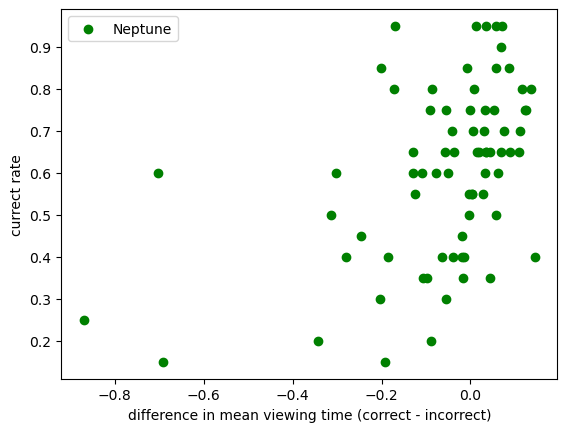

In [26]:
# days = ['0223', '0224', '0225', '0226', '0227', '0228', '0302', '0303', '0304', '0305', '0306', '0307']
# monkey = 'Jupyter'
# days = ['0506', '0507', '0518', '0519', '0520', '0521', '0525', '0526', '0527', '0528']
# monkey = 'Mercury'
days = ['0527', '0528', '0601','0602','0603','0604', '0608','0609', '0610', '0611', '0615', '0616', '0617', '0618', '0622']
monkey = 'Neptune'
print(monkey[0])
diff = []
correct_rate = []
for day in days:
    expect_dir = f'F:/dku2023/eyemovement/{monkey}/{day}/'
    output = pd.read_csv(''+expect_dir+'output_'+day+'.csv').to_numpy()
    for i in range(5):
        start_index = i * 20
        end_index = min(start_index + 20, np.shape(output)[0])
        total_response_time = []
        correct_response_time = []
        incorrect_response_time = []
        target_valid = []

        foil_valid = []
        correct = 0
        for record in output[start_index: end_index]:
            #if record[3] <= max1 and record[3] > max((min1, 0)):
            total_response_time.append(record[3])
            if record[5] == 1:
                    correct_response_time.append(record[3])
                    target_valid.append(record[6])
                    correct += 1

            elif record[5] == 0:
                    foil_valid.append(record[6])
                    incorrect_response_time.append(record[3])
        if np.isnan(np.mean(target_valid) - np.mean(foil_valid)):
                continue
        diff.append(np.mean(target_valid) - np.mean(foil_valid))
        correct_rate.append(correct/(end_index - start_index))

from scipy import stats
res = stats.pearsonr(diff, correct_rate)
print("correlation coefficient: ", res)
plt.scatter(diff, correct_rate, marker='o', label=f"{monkey}", color = 'green')
plt.xlabel("difference in mean viewing time (correct - incorrect)")
plt.ylabel("currect rate")
plt.legend()
#plt.savefig(f'F:/dku2023/eyemovement/graphs/{monkey}/target_foil{day}.png')
plt.show()

In [ ]:
#days = ['0223', '0224', '0225', '0226', '0227', '0228', '0302', '0303', '0304', '0305', '0306', '0307']
days = ['0506', '0507', '0518', '0519', '0520', '0521', '0525', '0526', '0527', '0528']
#days = ['0527', '0528', '0601','0602','0603','0604', '0608','0609', '0610', '0611', '0615', '0616', '0617', '0618', '0622']
monkey = 'Mercury'
#monkey = 'Jupyter'
#monkey = 'Neptune'
print(monkey[0])
for day in days:   
    expect_dir = f'F:/dku2023/eyemovement/{monkey}/{day}/'
    output = pd.read_csv(''+expect_dir+'output_'+day+'.csv').to_numpy()
    total_response_time = []
    correct_response_time = []
    incorrect_response_time = []
    target_valid = []
    target_valid_08 = []
    target_valid_06 = []
    target_valid_04 = []
    target_valid_02 = []
    foil_valid = []
    foil_valid_08 = []
    foil_valid_06 = []
    foil_valid_04 = []
    foil_valid_02 = []
    copy = np.copy(output)
    min1, max1 = cal_iqr(copy)
    count = 0
    for record in output:
        #if record[3] <= max1 and record[3] > max((min1, 0)):
        total_response_time.append(record[3])
        if record[5] == 1:
            if record[16] != 0:
                correct_response_time.append(record[3])
                target_valid.append(record[11])
                if record[3] >= 0.8:
                    target_valid_02.append(record[12])
                    target_valid_04.append(record[13])
                    target_valid_06.append(record[14])
                    target_valid_08.append(record[15])
        elif record[5] == 0:
            if record[16] != 0:
                foil_valid.append(record[11])
                incorrect_response_time.append(record[3])
                if record[3] >= 0.8:
                    foil_valid_02.append(record[12])
                    foil_valid_04.append(record[13])
                    foil_valid_06.append(record[14])
                    foil_valid_08.append(record[15])
        # else:
        #     count += 1
    print("exclude: ", count, day)

    if np.any(np.array(correct_response_time) > 30) | np.any(np.array(incorrect_response_time) > 30):
        w = 2
    elif np.any(np.array(correct_response_time) > 25) | np.any(np.array(incorrect_response_time) > 25):
        w = 1.2
    elif np.any(np.array(correct_response_time) > 15) | np.any(np.array(incorrect_response_time) > 15):
        w = 0.7
    elif np.any(np.array(correct_response_time) > 10) | np.any(np.array(incorrect_response_time) > 10):
        w = 0.5    
    elif np.any(np.array(correct_response_time) > 3) | np.any(np.array(incorrect_response_time) > 3):
        w = 0.2
    else:
        w = 0.1

    from scipy import stats
    plt.figure(figsize=(25,5))
    plt.subplot(1,3,1)
    plt.title('Response time distribution (exclude viewing time == 0)')
    #plt.bar(['target_viewing_time_percent','foil_viewing_time_percent'], [df_all['target_viewing_time_percent'].mean(),df_all['foil_viewing_time_percent'].mean()],color=['blue','yellow'], width=0.)
    plt.hist(correct_response_time, width = w, alpha = 0.4, label = 'correct')
    plt.hist(incorrect_response_time, width = w, alpha = 0.4, label = 'incorrect')
    #plt.text(1, 3, f'total trial: {np.shape(correct_response_time)[0] + np.shape(incorrect_response_time)[0]}')
    plt.xlabel('sec')
    plt.ylabel('num of trials')
    plt.legend()

    plt.subplot(1,3,2)
    plt.title('viewing time-response time ratio')
    new_view = (np.copy(output[:,16]))
    new_response = (np.copy(output[:, 3]))
    ratio = np.divide(new_view, new_response, out=np.zeros_like(new_view), where=new_response!=0)
    num_of_zero = np.shape(ratio)[0] - np.count_nonzero(ratio)
    plt.text(0.45, 20, f'number of trial that ratio is 0: {num_of_zero}')
    plt.hist(ratio, bins=30)
    plt.xticks(np.arange(0, 1, 0.1))
    plt.xlabel('ratio')
    plt.ylabel('num of trials')
    plt.legend()


    plt.subplot(1,3,3)
    plt.title('viewing time-response time ratio')
    new_view = (np.copy(output[:,16]))
    new_response = (np.copy(output[:, 3]))
    ratio = np.divide(new_view, new_response, out=np.zeros_like(new_view), where=new_response!=0)
    choice_correct = (np.copy(output[:,5]) == 1)
    choice_incorrect = (np.copy(output[:,5]) == 0)
    ratio_correct = ratio[choice_correct]
    ratio_incorrect = ratio[choice_incorrect]
    num_of_zero_correct = np.shape(ratio_correct)[0] - np.count_nonzero(ratio_correct)
    num_of_zero_incorrect = np.shape(ratio_incorrect)[0] - np.count_nonzero(ratio_incorrect)
    plt.text(0.2, 10, f'correct trial ratio is 0: {num_of_zero_correct}, incorrect trial ratio is 0: {num_of_zero_incorrect}')
    plt.hist(ratio_correct, bins=30, alpha = 0.4, label = 'correct')
    plt.hist(ratio_incorrect, bins=30, alpha = 0.4, label = 'incorrect')
    plt.xticks(np.arange(0, 1, 0.1))
    plt.xlabel('ratio')
    plt.ylabel('num of trials')
    plt.legend()
    plt.savefig(f'F:/dku2023/eyemovement/graphs/{monkey}/ratio_compare{day}.png')
    plt.show()

In [ ]:
from scipy import stats
plt.figure(figsize=(25,5))
plt.subplot(1,2,1)
plt.title('Response time distribution')
#plt.bar(['target_viewing_time_percent','foil_viewing_time_percent'], [df_all['target_viewing_time_percent'].mean(),df_all['foil_viewing_time_percent'].mean()],color=['blue','yellow'], width=0.)
plt.hist(correct_response_time, bins=30, alpha = 0.4, label = 'correct')
plt.hist(incorrect_response_time, bins=30, alpha = 0.4, label = 'incorrect')
plt.text(1, 3, f'total trial: {np.shape(correct_response_time)[0] + np.shape(incorrect_response_time)[0]}')
plt.xlabel('sec')
plt.ylabel('num of trials')
plt.legend()

plt.subplot(1,2,2)
plt.title('viewing time-response time ratio')
filter = (output[:, 3] >= min1) & (output[:, 3] <= max1)
new_view = (np.copy(output[:,16]))[filter]
new_response = (np.copy(output[:, 3]))[filter]
ratio = np.divide(new_view, new_response, out=np.zeros_like(new_view), where=new_response!=0)
num_of_zero = np.shape(ratio)[0] - np.count_nonzero(ratio)
plt.text(0.45, 30, f'number of trial that ratio is 0: {num_of_zero}')
plt.hist(ratio, bins=30)
plt.xticks(np.arange(0, 1, 0.05))
plt.xlabel('ratio')
plt.ylabel('num of trials')
plt.legend()
plt.savefig('C:/Users/River/23summer/dku/edf_monkey/Data/' + monkey + '/graph_' + monkey +'/ratio_compare' + day + '.png')
plt.show()

In [ ]:
days = ['0223', '0224', '0225', '0226', '0227', '0228', '0302', '0303', '0304', '0305', '0306', '0307']
monkey = 'Jupyter'
#days = ['0506', '0507', '0518', '0519', '0520', '0521', '0525', '0526', '0527', '0528']
#monkey = 'Mercury'
# days = ['0527', '0528', '0601','0602','0603','0604', '0608','0609', '0610', '0611', '0615', '0616', '0617', '0618', '0622']
# monkey = 'Neptune'
print(monkey[0])
for day in days:  
    expect_dir = f'F:/dku2023/eyemovement/{monkey}/{day}/'
    output = pd.read_csv(''+expect_dir+'output_'+day+'.csv').to_numpy()
    total_response_time = []
    correct_response_time = []
    incorrect_response_time = []
    target_valid = []
    target_valid_08 = []
    target_valid_06 = []
    target_valid_04 = []
    target_valid_02 = []
    foil_valid = []
    foil_valid_08 = []
    foil_valid_06 = []
    foil_valid_04 = []
    foil_valid_02 = []
    copy = np.copy(output)
    min1, max1 = cal_iqr(copy)
    count = 0
    for record in output:
        #if record[3] <= max1 and record[3] > max((min1, 0)):
        total_response_time.append(record[3])
        if record[5] == 1:
            if record[16] != 0:
                correct_response_time.append(record[3])
                target_valid.append(record[11])
                if record[3] >= 0.8:
                    target_valid_02.append(record[12])
                    target_valid_04.append(record[13])
                    target_valid_06.append(record[14])
                    target_valid_08.append(record[15])
        elif record[5] == 0:
            if record[16] != 0:
                foil_valid.append(record[11])
                incorrect_response_time.append(record[3])
                if record[3] >= 0.8:
                    foil_valid_02.append(record[12])
                    foil_valid_04.append(record[13])
                    foil_valid_06.append(record[14])
                    foil_valid_08.append(record[15])
        # else:
        #     count += 1
    print("exclude: ", count, day)

    plt.figure(figsize=(25,5))
    plt.subplot(1,4,1)
    plt.title('Percentage Viewing Time_all trials')
    #plt.bar(['target_viewing_time_percent','foil_viewing_time_percent'], [df_all['target_viewing_time_percent'].mean(),df_all['foil_viewing_time_percent'].mean()],color=['blue','yellow'], width=0.)

    sem = [stats.sem(target_valid), stats.sem(foil_valid)]
    print(sem)
    stat, pvalue = stats.ttest_ind(target_valid, foil_valid)
    p1 = plt.bar(['Target','Foil'], [np.mean(target_valid), np.mean(foil_valid)], yerr = sem, color=['blue','yellow'], width=0.8)
    l = [f'n={len(target_valid)}', f'n={len(foil_valid)}']
    plt.bar_label(p1, labels = l)
    plt.text('Target',np.mean(target_valid) + 0.05, '       pvalue = %.4f' % pvalue)
    plt.legend()

    plt.subplot(1,4,2)
    plt.title('percentage on selection for time_before_response')
    x_axis = ["0.8", "0.6", "0.4", "0.2"]
    target = [target_valid_08, target_valid_06, target_valid_04, target_valid_02]
    foil = [foil_valid_08, foil_valid_06, foil_valid_04, foil_valid_02]
    mean_values_target = [np.mean(target_valid_08), np.mean(target_valid_06), np.mean(target_valid_04), np.mean(target_valid_02)]
    mean_values_foil = [np.mean(foil_valid_08), np.mean(foil_valid_06), np.mean(foil_valid_04), np.mean(foil_valid_02)]
    std_values_target = [np.std(target_valid_08), np.std(target_valid_06), np.std(target_valid_04), np.std(target_valid_02)]
    std_values_foil = [np.std(foil_valid_08), np.std(foil_valid_06), np.std(foil_valid_04), np.std(foil_valid_02)]
    p2 = plt.plot(x_axis, mean_values_target, marker='o', label='target', color = 'green')
    l_target = [f'n={len(target_valid_08)}', f'n={len(target_valid_06)}', f'n={len(target_valid_04)}', f'n={len(target_valid_02)}']
    i = 0
    for a,b in zip(x_axis,mean_values_target):
        plt.text(a,b,l_target[i], ha = 'center',va = 'bottom',fontsize=7)
        i += 1
    # Plot the second line
    p3 = plt.plot(x_axis, mean_values_foil, marker='o', label='foil', color = 'orange')
    l_foil = [f'n={len(foil_valid_08)}', f'n={len(foil_valid_06)}', f'n={len(foil_valid_04)}', f'n={len(foil_valid_02)}']
    i = 0
    for a,b in zip(x_axis,mean_values_foil):
        plt.text(a,b,l_foil[i], ha = 'center',va = 'bottom',fontsize=7)
        i += 1

    i = 0
    for a,b,c in zip(x_axis,mean_values_foil, mean_values_target):
        stat, pvalue = stats.ttest_ind(target[i], foil[i])
        plt.text(a,(b + c) / 2, 'pvalue = %.4f' % pvalue, ha = 'center',va = 'bottom',fontsize=7)
        i += 1
    plt.legend()
    
    plt.subplot(1,4,3)
    plt.title('Response time for selecting correct/incorrect item')
    #plt.bar(['target_viewing_time_percent','foil_viewing_time_percent'], [df_all['target_viewing_time_percent'].mean(),df_all['foil_viewing_time_percent'].mean()],color=['blue','yellow'], width=0.)
    sem = [stats.sem(correct_response_time), stats.sem(incorrect_response_time)]
    print(sem)
    stat, pvalue = stats.ttest_ind(correct_response_time, incorrect_response_time)
    p1 = plt.bar(['Target','Foil'], [np.mean(correct_response_time), np.mean(incorrect_response_time)], yerr = sem, color=['blue','yellow'], width=0.8)
    l = [f'n={len(correct_response_time)}', f'n={len(incorrect_response_time)}']
    plt.bar_label(p1, labels = l)
    plt.text('Target',np.mean(correct_response_time) + 0.05, '            pvalue = %.4f' % pvalue)
    plt.legend()

    plt.subplot(1,4,4)
    plt.title('Response time (exclude viewing time == 0)')
    #plt.bar(['target_viewing_time_percent','foil_viewing_time_percent'], [df_all['target_viewing_time_percent'].mean(),df_all['foil_viewing_time_percent'].mean()],color=['blue','yellow'], width=0.)
    plt.hist(correct_response_time+incorrect_response_time)
    plt.legend()

    plt.savefig(f'F:/dku2023/eyemovement/graphs/{monkey}/target_foil{day}.png')
    plt.show()

## output format
- trial_index, time_start, time_end, duration(response time), box_chosen, correct_or_not, time_on_selected_picture, time_on_pic_0.2, time_on_pic_0.4, time_on_pic_0.6, time_on_pic_0.8, percentage_on_pic_0.2, percentage_on_pic_0.4, percentage_on_pic_0.6, percentage_on_pic_0.8
- time: 1s = 2000 lines, 0.2s = 400, 0.4s = 800, 0.6s = 1200, 0.8s = 1600. Thus, 1 line = 1/2000s

In [ ]:
monkey = 'Neptune'
expect_dir = f'F:/dku2023/eyemovement/{monkey}/'
df_header = pd.read_csv('' + expect_dir + 'merged_behavior.csv')
#print(''+day+'/J_'+day+'_BHV/2023'+day+'_bhv.csv')
print(df_header.shape)

output = np.empty((df_header.shape[0], 17), dtype=object)
output[:] = ""

headers = ['col1', 'col2', 'col3', 'col4', 'col5', 'col6', 'col7', 'col8', 'col9', 'col10']
data_f = pd.read_csv('' + expect_dir + 'merged_data.csv', sep=',', skiprows = 1, header=None, names=headers, dtype={"col1": int, "col2": float, "col3": object, "col4": object, "col5": float, "col6": float, "col7": object, "col8": object, "col9": object, "col10": object})
data = data_f.to_numpy()
print(data.shape)

In [ ]:
trial_index = 0
current_data_index = 0
# 0:5 trial_index, time_start, time_end, duration(response time), box_chosen, correct_or_not, 
# 6:10 time_on_selected_picture, time_on_pic_0.2, time_on_pic_0.4, time_on_pic_0.6, time_on_pic_0.8, 
# 11:15 percent_on_pic_trial, percentage_on_pic_0.2, percentage_on_pic_0.4, percentage_on_pic_0.6, percentage_on_pic_0.8
try:
    while current_data_index < np.shape(data)[0]:
        if data[current_data_index][-2] is np.nan:
            current_data_index += 1
        elif 'forcedchoice_start' in data[current_data_index][-2]:
            output[trial_index][0] = trial_index
            output[trial_index][1] = data[current_data_index][1]
            print("start time", )
            start_data_index = current_data_index
            while (type(data[current_data_index][-2]) != float ) and ('forcedchoice_start' in data[current_data_index][-2]):
                current_data_index += 1
            end_data_index = current_data_index
            print("trial index: ", trial_index)
            output[trial_index][2] = data[end_data_index - 1][1]
            output[trial_index][4] = df_header['pic_chosen_position'][trial_index]
            output[trial_index][5] = df_header['response'][trial_index]
            chosen_pic = df_header['pic_chosen'][trial_index]
            output[trial_index][3], output[trial_index][6], output[trial_index][7], output[trial_index][8], \
                output[trial_index][9], output[trial_index][10], output[trial_index][11], output[trial_index][12], \
                    output[trial_index][13], output[trial_index][14], output[trial_index][15], output[trial_index][16] \
                        = cal_time_on_pic(chosen_pic, start_data_index, end_data_index - 2000, data)
            trial_index += 1
        elif 'forcedmemory_start' in data[current_data_index][-2]:
            current_data_index += 1
        else:
            print("error occurs in line", current_data_index)
            raise(ValueError) 
except ValueError:
    print("???")

pd.DataFrame(output).to_csv(f'{expect_dir}merged_output.csv', index = False)

In [ ]:
output = pd.read_csv(''+expect_dir+'merged_output.csv').to_numpy()
print(np.shape(output))

In [ ]:
total_response_time = []
correct_response_time = []
incorrect_response_time = []
target_valid = []
target_valid_08 = []
target_valid_06 = []
target_valid_04 = []
target_valid_02 = []
foil_valid = []
foil_valid_08 = []
foil_valid_06 = []
foil_valid_04 = []
foil_valid_02 = []
copy = np.copy(output)
min1, max1 = cal_iqr(copy)
count = 0
for record in output:
    #if record[3] <= max1 and record[3] > max((min1, 0)):
    total_response_time.append(record[3])
    if record[5] == 1:
        if record[16] != 0:
            correct_response_time.append(record[3])
            target_valid.append(record[11])
            if record[3] >= 0.8:
                target_valid_02.append(record[12])
                target_valid_04.append(record[13])
                target_valid_06.append(record[14])
                target_valid_08.append(record[15])
    elif record[5] == 0:
        if record[16] != 0:
            foil_valid.append(record[11])
            incorrect_response_time.append(record[3])
            if record[3] >= 0.8:
                foil_valid_02.append(record[12])
                foil_valid_04.append(record[13])
                foil_valid_06.append(record[14])
                foil_valid_08.append(record[15])
    # else:
    #     count += 1
print("exclude: ", count, day)

if np.any(np.array(correct_response_time) > 30) | np.any(np.array(incorrect_response_time) > 30):
    w = 2
elif np.any(np.array(correct_response_time) > 25) | np.any(np.array(incorrect_response_time) > 25):
    w = 1.2
elif np.any(np.array(correct_response_time) > 15) | np.any(np.array(incorrect_response_time) > 15):
    w = 0.7
elif np.any(np.array(correct_response_time) > 10) | np.any(np.array(incorrect_response_time) > 10):
    w = 0.5    
elif np.any(np.array(correct_response_time) > 3) | np.any(np.array(incorrect_response_time) > 3):
    w = 0.2
else:
    w = 0.1

from scipy import stats
plt.figure(figsize=(25,5))
plt.subplot(1,3,1)
plt.title('Response time distribution (exclude viewing time == 0)')
#plt.bar(['target_viewing_time_percent','foil_viewing_time_percent'], [df_all['target_viewing_time_percent'].mean(),df_all['foil_viewing_time_percent'].mean()],color=['blue','yellow'], width=0.)
plt.hist(correct_response_time, width = w, alpha = 0.4, label = 'correct')
plt.hist(incorrect_response_time, width = w, alpha = 0.4, label = 'incorrect')
#plt.text(1, 3, f'total trial: {np.shape(correct_response_time)[0] + np.shape(incorrect_response_time)[0]}')
plt.xlabel('sec')
plt.ylabel('num of trials')
plt.legend()

plt.subplot(1,3,2)
plt.title('viewing time-response time ratio')
new_view = (np.copy(output[:,16]))
new_response = (np.copy(output[:, 3]))
ratio = np.divide(new_view, new_response, out=np.zeros_like(new_view), where=new_response!=0)
num_of_zero = np.shape(ratio)[0] - np.count_nonzero(ratio)
plt.text(0.45, 20, f'number of trial that ratio is 0: {num_of_zero}')
plt.hist(ratio, bins=30)
plt.xticks(np.arange(0, 1, 0.1))
plt.xlabel('ratio')
plt.ylabel('num of trials')
plt.legend()


plt.subplot(1,3,3)
plt.title('viewing time-response time ratio')
new_view = (np.copy(output[:,16]))
new_response = (np.copy(output[:, 3]))
ratio = np.divide(new_view, new_response, out=np.zeros_like(new_view), where=new_response!=0)
choice_correct = (np.copy(output[:,5]) == 1)
choice_incorrect = (np.copy(output[:,5]) == 0)
ratio_correct = ratio[choice_correct]
ratio_incorrect = ratio[choice_incorrect]
num_of_zero_correct = np.shape(ratio_correct)[0] - np.count_nonzero(ratio_correct)
num_of_zero_incorrect = np.shape(ratio_incorrect)[0] - np.count_nonzero(ratio_incorrect)
plt.text(0.2, 10, f'correct trial ratio is 0: {num_of_zero_correct}, incorrect trial ratio is 0: {num_of_zero_incorrect}')
plt.hist(ratio_correct, bins=30, alpha = 0.4, label = 'correct')
plt.hist(ratio_incorrect, bins=30, alpha = 0.4, label = 'incorrect')
plt.xticks(np.arange(0, 1, 0.1))
plt.xlabel('ratio')
plt.ylabel('num of trials')
plt.legend()
plt.savefig(f'F:/dku2023/eyemovement/graphs/{monkey}/ratio_compare.png')
plt.show()

In [ ]:
total_response_time = []
correct_response_time = []
incorrect_response_time = []
target_valid = []
target_valid_08 = []
target_valid_06 = []
target_valid_04 = []
target_valid_02 = []
foil_valid = []
foil_valid_08 = []
foil_valid_06 = []
foil_valid_04 = []
foil_valid_02 = []
copy = np.copy(output)
min1, max1 = cal_iqr(copy)
count = 0
for record in output:
    #if record[3] <= max1 and record[3] > max((min1, 0)):
    total_response_time.append(record[3])
    if record[5] == 1:
        if record[16] != 0:
            correct_response_time.append(record[3])
            target_valid.append(record[11])
            if record[3] >= 0.8:
                target_valid_02.append(record[12])
                target_valid_04.append(record[13])
                target_valid_06.append(record[14])
                target_valid_08.append(record[15])
    elif record[5] == 0:
        if record[16] != 0:
            foil_valid.append(record[11])
            incorrect_response_time.append(record[3])
            if record[3] >= 0.8:
                foil_valid_02.append(record[12])
                foil_valid_04.append(record[13])
                foil_valid_06.append(record[14])
                foil_valid_08.append(record[15])
    # else:
    #     count += 1
print("exclude: ", count, day)

plt.figure(figsize=(25,5))
plt.subplot(1,4,1)
plt.title('Percentage Viewing Time_all trials')
#plt.bar(['target_viewing_time_percent','foil_viewing_time_percent'], [df_all['target_viewing_time_percent'].mean(),df_all['foil_viewing_time_percent'].mean()],color=['blue','yellow'], width=0.)

sem = [stats.sem(target_valid), stats.sem(foil_valid)]
print(sem)
stat, pvalue = stats.ttest_ind(target_valid, foil_valid)
p1 = plt.bar(['Target','Foil'], [np.mean(target_valid), np.mean(foil_valid)], yerr = sem, color=['blue','yellow'], width=0.8)
l = [f'n={len(target_valid)}', f'n={len(foil_valid)}']
plt.bar_label(p1, labels = l)
plt.text('Target',np.mean(target_valid) + 0.05, '       pvalue = %.4f' % pvalue)
plt.legend()

plt.subplot(1,4,2)
plt.title('percentage on selection for time_before_response')
x_axis = ["0.8", "0.6", "0.4", "0.2"]
target = [target_valid_08, target_valid_06, target_valid_04, target_valid_02]
foil = [foil_valid_08, foil_valid_06, foil_valid_04, foil_valid_02]
mean_values_target = [np.mean(target_valid_08), np.mean(target_valid_06), np.mean(target_valid_04), np.mean(target_valid_02)]
mean_values_foil = [np.mean(foil_valid_08), np.mean(foil_valid_06), np.mean(foil_valid_04), np.mean(foil_valid_02)]
std_values_target = [np.std(target_valid_08), np.std(target_valid_06), np.std(target_valid_04), np.std(target_valid_02)]
std_values_foil = [np.std(foil_valid_08), np.std(foil_valid_06), np.std(foil_valid_04), np.std(foil_valid_02)]
p2 = plt.plot(x_axis, mean_values_target, marker='o', label='target', color = 'green')
l_target = [f'n={len(target_valid_08)}', f'n={len(target_valid_06)}', f'n={len(target_valid_04)}', f'n={len(target_valid_02)}']
i = 0
for a,b in zip(x_axis,mean_values_target):
    plt.text(a,b,l_target[i], ha = 'center',va = 'bottom',fontsize=7)
    i += 1
# Plot the second line
p3 = plt.plot(x_axis, mean_values_foil, marker='o', label='foil', color = 'orange')
l_foil = [f'n={len(foil_valid_08)}', f'n={len(foil_valid_06)}', f'n={len(foil_valid_04)}', f'n={len(foil_valid_02)}']
i = 0
for a,b in zip(x_axis,mean_values_foil):
    plt.text(a,b,l_foil[i], ha = 'center',va = 'bottom',fontsize=7)
    i += 1

i = 0
for a,b,c in zip(x_axis,mean_values_foil, mean_values_target):
    stat, pvalue = stats.ttest_ind(target[i], foil[i])
    plt.text(a,(b + c) / 2, 'pvalue = %.4f' % pvalue, ha = 'center',va = 'bottom',fontsize=7)
    i += 1
plt.legend()

plt.subplot(1,4,3)
plt.title('Response time for selecting correct/incorrect item')
#plt.bar(['target_viewing_time_percent','foil_viewing_time_percent'], [df_all['target_viewing_time_percent'].mean(),df_all['foil_viewing_time_percent'].mean()],color=['blue','yellow'], width=0.)
sem = [stats.sem(correct_response_time), stats.sem(incorrect_response_time)]
print(sem)
stat, pvalue = stats.ttest_ind(correct_response_time, incorrect_response_time)
p1 = plt.bar(['Target','Foil'], [np.mean(correct_response_time), np.mean(incorrect_response_time)], yerr = sem, color=['blue','yellow'], width=0.8)
l = [f'n={len(correct_response_time)}', f'n={len(incorrect_response_time)}']
plt.bar_label(p1, labels = l)
plt.text('Target',np.mean(correct_response_time) + 0.05, '            pvalue = %.4f' % pvalue)
plt.legend()

plt.subplot(1,4,4)
plt.title('Response time (exclude viewing time == 0)')
#plt.bar(['target_viewing_time_percent','foil_viewing_time_percent'], [df_all['target_viewing_time_percent'].mean(),df_all['foil_viewing_time_percent'].mean()],color=['blue','yellow'], width=0.)
plt.hist(correct_response_time+incorrect_response_time)
plt.legend()

plt.savefig(f'F:/dku2023/eyemovement/graphs/{monkey}/target_foil.png')
plt.show()

In [ ]:
# 0:5 trial_index, time_start, time_end, duration(response time), box_chosen, correct_or_not, 
# 6:10 time_on_selected_picture, time_on_pic_0.2, time_on_pic_0.4, time_on_pic_0.6, time_on_pic_0.8, 
# 11:15 percent_on_pic_trial, percentage_on_pic_0.2, percentage_on_pic_0.4, percentage_on_pic_0.6, percentage_on_pic_0.8
correct_response_time = []
incorrect_response_time = []
target_valid = []
target_valid_08 = []
target_valid_06 = []
target_valid_04 = []
target_valid_02 = []
foil_valid = []
foil_valid_08 = []
foil_valid_06 = []
foil_valid_04 = []
foil_valid_02 = []

min1, max1 = cal_iqr(output)
print(min1, max1)
for record in output:
    # if record[3] <= max1 and record[3] >= max((min1, 0)):
    if record[5] == 1:
        
        if record[16] != 0:
            correct_response_time.append(record[3])
            target_valid.append(record[11])
            if record[3] >= 0.8:
                target_valid_02.append(record[12])
                target_valid_04.append(record[13])
                target_valid_06.append(record[14])
                target_valid_08.append(record[15])
    elif record[5] == 0:
        
        if record[16] != 0:
            foil_valid.append(record[11])
            incorrect_response_time.append(record[3])
            if record[3] >= 0.8:
                foil_valid_02.append(record[12])
                foil_valid_04.append(record[13])
                foil_valid_06.append(record[14])
                foil_valid_08.append(record[15])
    # else:
    #     print(record[3])



In [ ]:
from scipy import stats
plt.figure(figsize=(25,5))
plt.subplot(1,4,1)
plt.title('Percentage Viewing Time_all trials')
#plt.bar(['target_viewing_time_percent','foil_viewing_time_percent'], [df_all['target_viewing_time_percent'].mean(),df_all['foil_viewing_time_percent'].mean()],color=['blue','yellow'], width=0.)
sem = [stats.sem(target_valid), stats.sem(foil_valid)]
print(sem)
stat, pvalue = stats.ttest_ind(target_valid, foil_valid)
p1 = plt.bar(['Target','Foil'], [np.mean(target_valid), np.mean(foil_valid)], yerr = sem, color=['blue','yellow'], width=0.8)
l = [f'n={len(target_valid)}', f'n={len(foil_valid)}']
plt.bar_label(p1, labels = l)
plt.text('Target',0.4, 'pvalue = %.4f' % pvalue)

plt.subplot(1,4,2)
plt.title('percentage on selection for time_before_response')
x_axis = ["0.8", "0.6", "0.4", "0.2"]
target = [target_valid_08, target_valid_06, target_valid_04, target_valid_02]
foil = [foil_valid_08, foil_valid_06, foil_valid_04, foil_valid_02]
mean_values_target = [np.mean(target_valid_08), np.mean(target_valid_06), np.mean(target_valid_04), np.mean(target_valid_02)]
mean_values_foil = [np.mean(foil_valid_08), np.mean(foil_valid_06), np.mean(foil_valid_04), np.mean(foil_valid_02)]
std_values_target = [np.std(target_valid_08), np.std(target_valid_06), np.std(target_valid_04), np.std(target_valid_02)]
std_values_foil = [np.std(foil_valid_08), np.std(foil_valid_06), np.std(foil_valid_04), np.std(foil_valid_02)]
p2 = plt.plot(x_axis, mean_values_target, marker='o', label='target')
l_target = [f'n={len(target_valid_08)}', f'n={len(target_valid_06)}', f'n={len(target_valid_04)}', f'n={len(target_valid_02)}']
i = 0
for a,b in zip(x_axis,mean_values_target):
    plt.text(a,b,l_target[i], ha = 'center',va = 'bottom',fontsize=7)
    i += 1
# Plot the second line
p3 = plt.plot(x_axis, mean_values_foil, marker='o', label='foil')
l_foil = [f'n={len(foil_valid_08)}', f'n={len(foil_valid_06)}', f'n={len(foil_valid_04)}', f'n={len(foil_valid_02)}']
i = 0
for a,b in zip(x_axis,mean_values_foil):
    plt.text(a,b,l_foil[i], ha = 'center',va = 'bottom',fontsize=7)
    i += 1

i = 0
for a,b,c in zip(x_axis,mean_values_foil, mean_values_target):
    stat, pvalue = stats.ttest_ind(target[i], foil[i])
    plt.text(a,(b + c) / 2, 'pvalue = %.4f' % pvalue, ha = 'center',va = 'bottom',fontsize=7)
    i += 1

plt.subplot(1,4,3)
plt.title('Response time for selecting correct/incorrect item')
#plt.bar(['target_viewing_time_percent','foil_viewing_time_percent'], [df_all['target_viewing_time_percent'].mean(),df_all['foil_viewing_time_percent'].mean()],color=['blue','yellow'], width=0.)
sem = [stats.sem(correct_response_time), stats.sem(incorrect_response_time)]
print(sem)
stat, pvalue = stats.ttest_ind(correct_response_time, incorrect_response_time)
p1 = plt.bar(['Target','Foil'], [np.mean(correct_response_time), np.mean(incorrect_response_time)], yerr = sem, color=['blue','yellow'], width=0.8)
l = [f'n={len(correct_response_time)}', f'n={len(incorrect_response_time)}']
plt.bar_label(p1, labels = l)
plt.text('Target',0.75, '            pvalue = %.4f' % pvalue)


plt.subplot(1,4,4)
plt.title('Response time for selecting item')
#plt.bar(['target_viewing_time_percent','foil_viewing_time_percent'], [df_all['target_viewing_time_percent'].mean(),df_all['foil_viewing_time_percent'].mean()],color=['blue','yellow'], width=0.)
plt.hist(correct_response_time+incorrect_response_time)
plt.legend()
plt.savefig('graph/output' + day + '.png')